![Image](https://images.unsplash.com/photo-1519567241046-7f570eee3ce6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
/kaggle/input/images/Mall image.jfif


In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Age', ylabel='Density'>

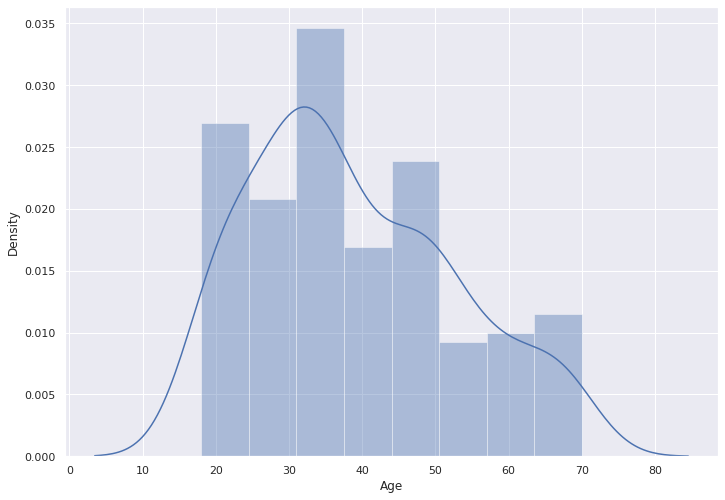

In [3]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

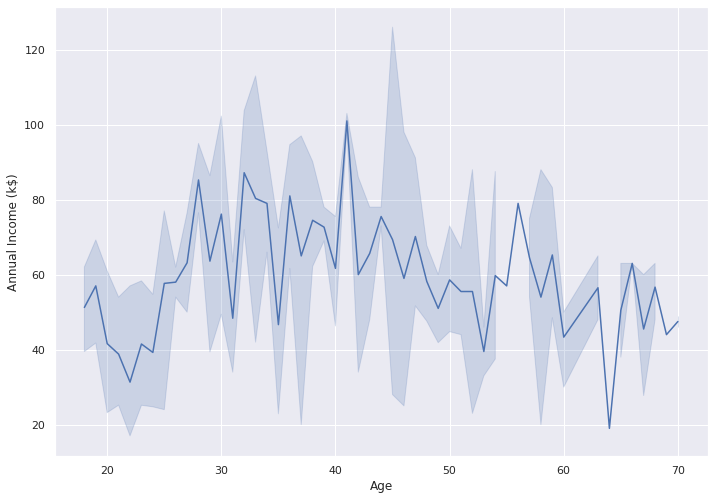

In [4]:
sns.lineplot(x='Age',y = 'Annual Income (k$)',data=data)

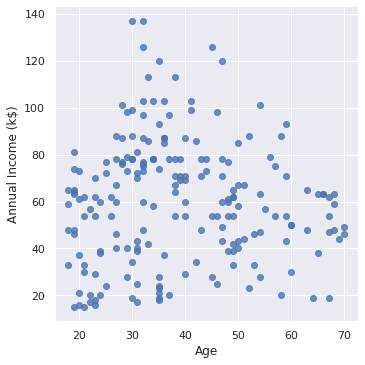

In [5]:
sns.lmplot('Age','Annual Income (k$)',data=data,fit_reg=False)

In [6]:
gender_spends_df = data.groupby('Gender').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).reset_index()
gender_spends_df

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


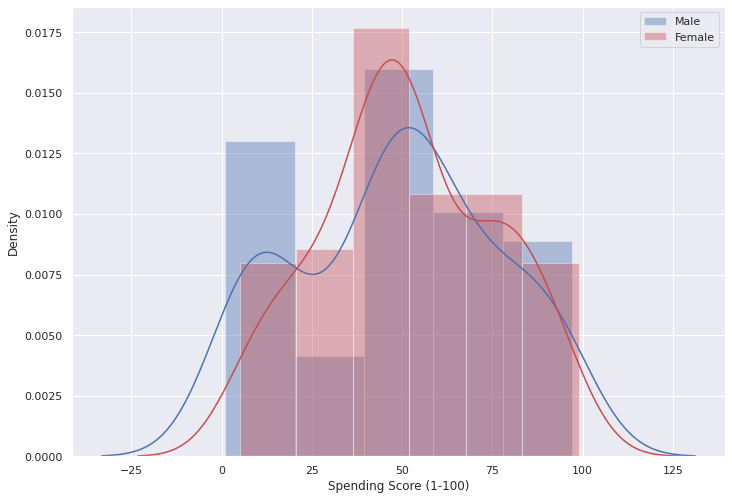

In [7]:
sns.distplot(data[data['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(data[data['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

### We notice that Females tend to Spend more than Males

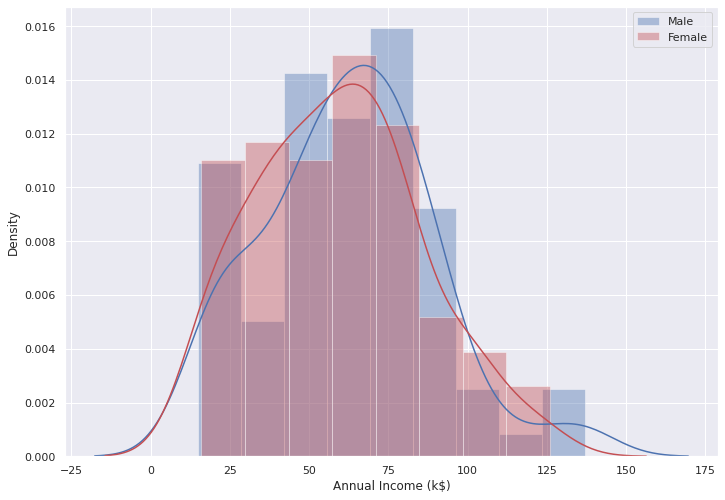

In [8]:
sns.distplot(data[data['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(data[data['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

### Males tend to Earn More than Women

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

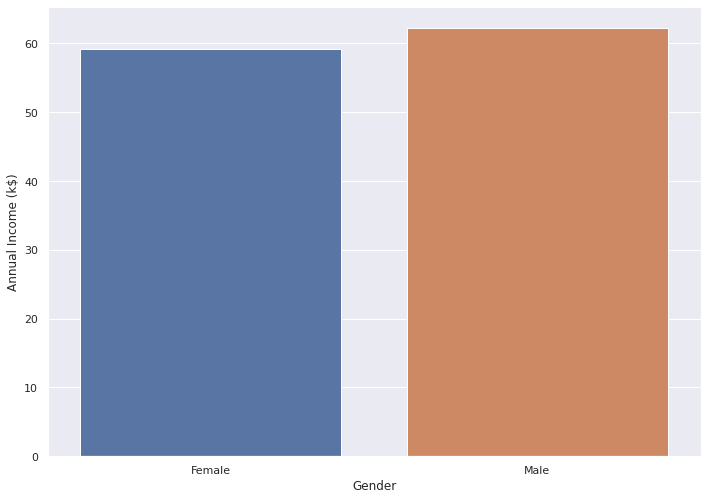

In [9]:
sns.barplot(x = 'Gender',y='Annual Income (k$)',data = gender_spends_df)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

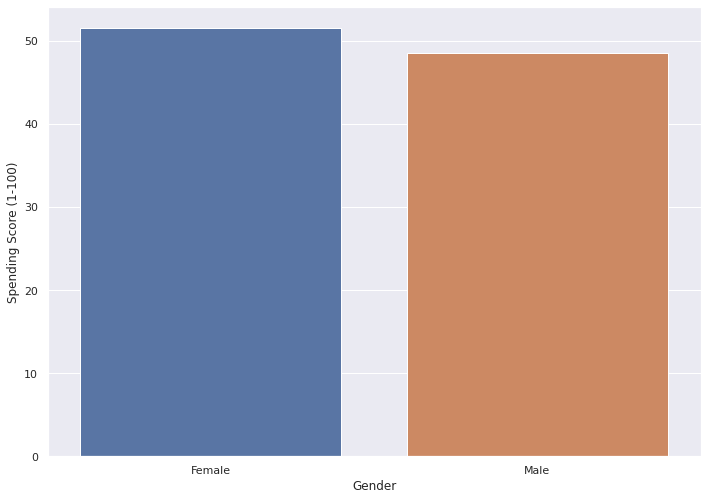

In [10]:
sns.barplot(x = 'Gender',y='Spending Score (1-100)',data = gender_spends_df)

### Normalising the Data

In [11]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])

### Using Elbow Curve method

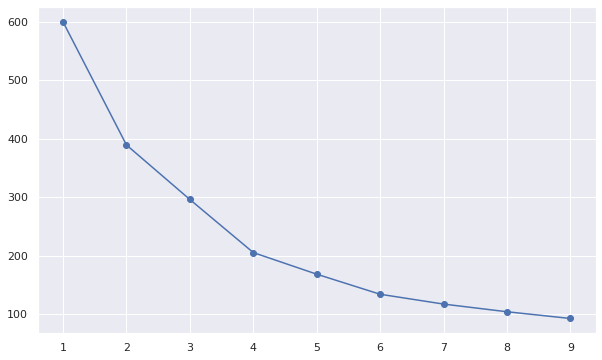

In [12]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_range, cluster_errors,marker = "o")

In [13]:
k = 4
clusters = KMeans(k,random_state = 42)
clusters.fit(scaled_df)
data['cluster_id'] = clusters.labels_
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id
25,26,Male,29,28,82,1
97,98,Female,27,60,50,1
159,160,Female,30,78,73,2
33,34,Male,18,33,92,1
150,151,Male,43,78,17,0


In [14]:
data.groupby(['cluster_id'])['Age','Annual Income (k$)','Spending Score (1-100)'].agg({'mean'}).reset_index()

,cluster_id,Age,Annual Income (k$),Spending Score (1-100)
,,mean,mean,mean
0,0,39.368421,86.500000,19.578947
1,1,25.438596,40.000000,60.298246
2,2,32.875000,86.100000,81.525000
3,3,53.984615,47.707692,39.969231


# First Cluster

In [15]:
cluster_0 = data[data['cluster_id']==0]
cluster_0_df = cluster_0.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

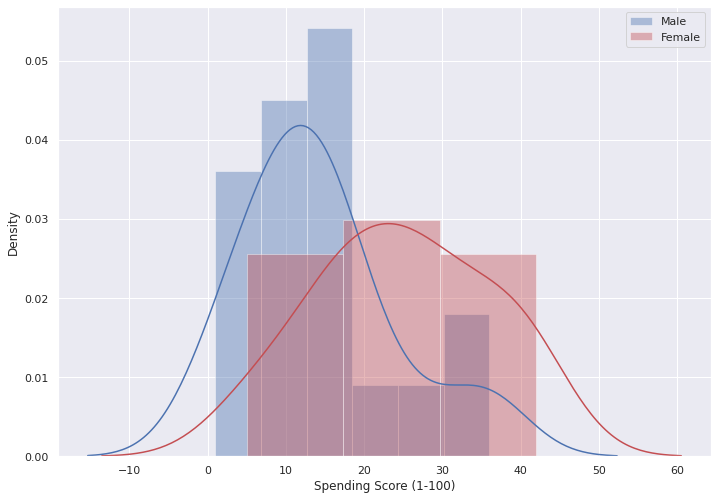

In [16]:
sns.distplot(cluster_0[cluster_0['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_0[cluster_0['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

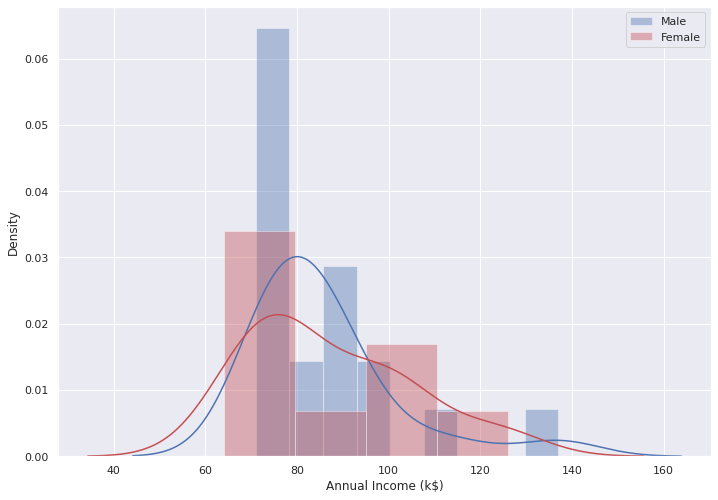

In [17]:
sns.distplot(cluster_0[cluster_0['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_0[cluster_0['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

### Cluster 0 - Observation
1. Female and Male Earn almost the same.
2. Women has more Spending habits.
3. Average age of customers is 39 and Average Annual Income is $86K and spends is very less compared to their income.

# 2nd Cluster

In [18]:
cluster_1 = data[data['cluster_id']==1]
cluster_1_df = cluster_1.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

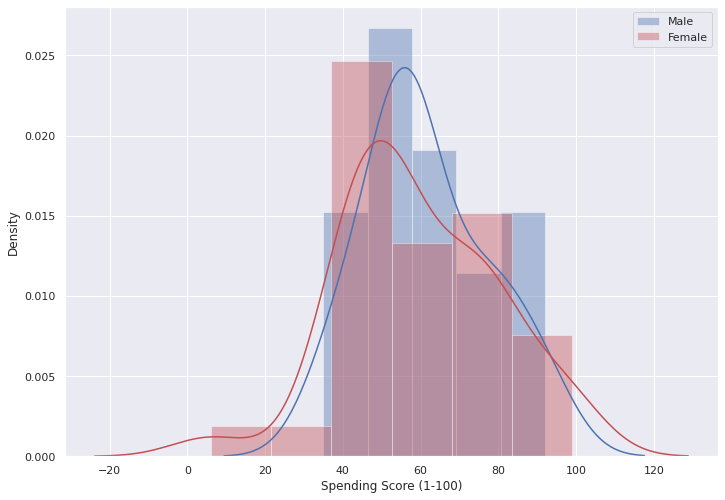

In [19]:
sns.distplot(cluster_1[cluster_1['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_1[cluster_1['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

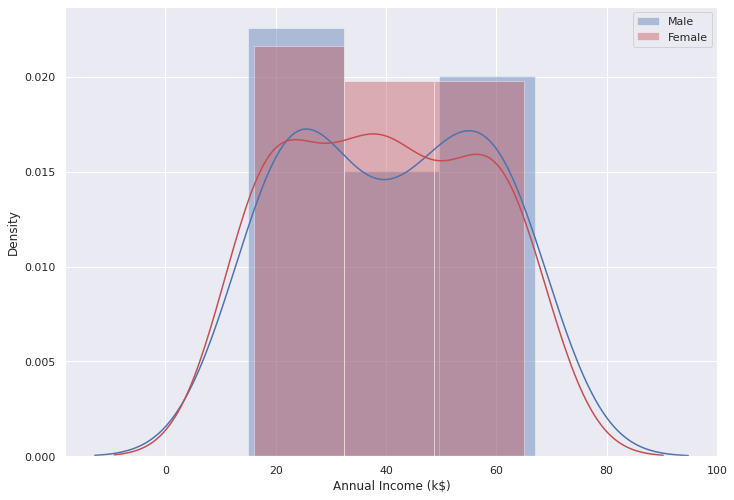

In [20]:
sns.distplot(cluster_1[cluster_1['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_1[cluster_1['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

## Observation:
1. Spends and Income in this group is both similar for Male and Female
2. Average Age is 25yrs.
3. Income is lesser than their Spends.
4. Male income and Spends is slightly above Females.

# 3rd Cluster

In [21]:
cluster_2 = data[data['cluster_id']==2]
cluster_2_df = cluster_2.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

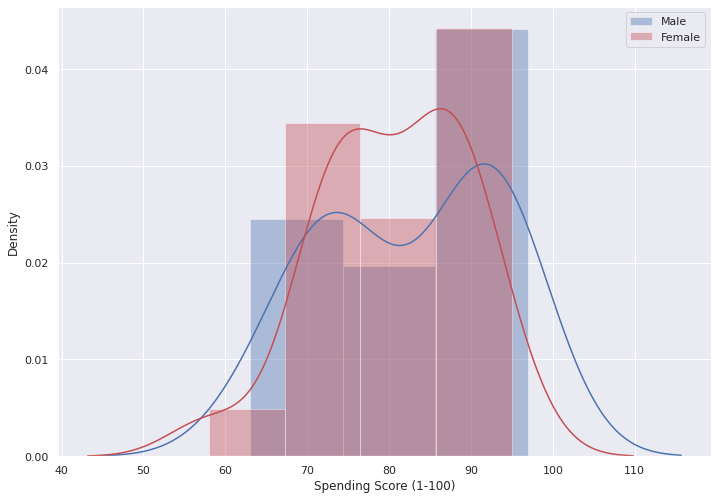

In [22]:
sns.distplot(cluster_2[cluster_2['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_2[cluster_2['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

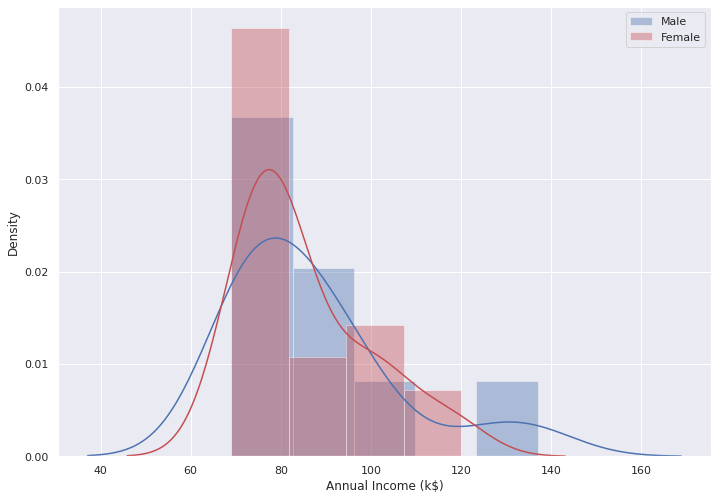

In [23]:
sns.distplot(cluster_2[cluster_2['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_2[cluster_2['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

## Observation:
1. Average age for this group is 33
2. Annual Income is high for this group and so is the Spending Score.
3. We observe that the Spends and Income of Males is slightly higher than Women.
4. Average Income is slightly higher than Average Spends

## 4th Cluster

In [24]:
cluster_3 = data[data['cluster_id']==3]
cluster_3_df = cluster_3.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

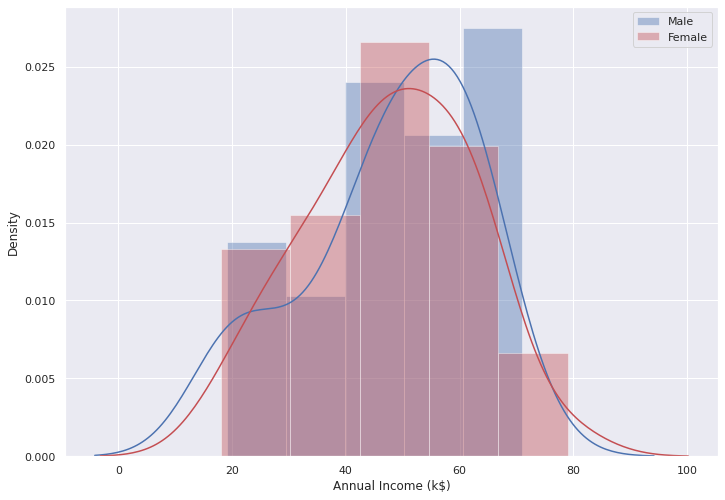

In [25]:
sns.distplot(cluster_3[cluster_3['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_3[cluster_3['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

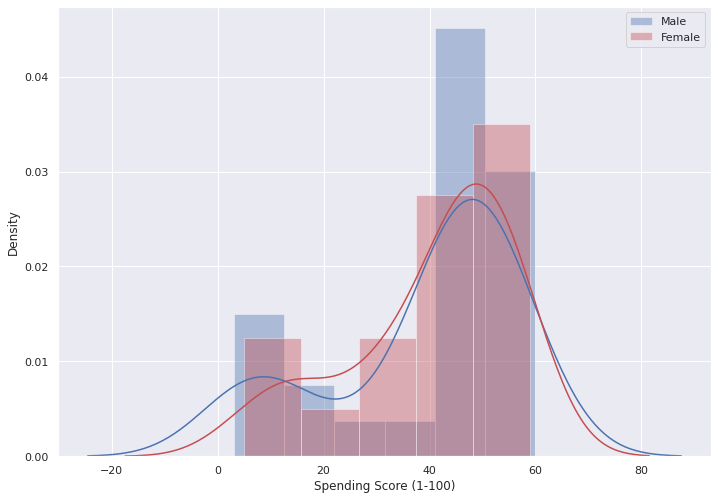

In [26]:
sns.distplot(cluster_3[cluster_3['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_3[cluster_3['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

## Observation
1. Average age of customers is 53
2. The number of customers in this category is 65.
3. The average income and Spends is medium.
4. Males annual income is slighlty higher and Spends a bit lower compared to Females.